<a href="https://colab.research.google.com/github/francobarrionuevoenv21/codeforenviroprojects/blob/VIIRS_fires_Delta/VIIRS_HS_2012_2022_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In case you are running this code in Colab or don't have installed the libraries, run this cell
!pip install geopandas

# **Import libraries, functions and files with data**

#### **Libraries**

In [ ]:
# Handling, processing and visualization of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Handling and processing of georreferenced data
import geopandas as gpd

# Other libraries
import matplotlib.ticker as plticker
import matplotlib.lines as mlines
from google.colab import files
import datetime as dt
from datetime import datetime

In [ ]:
# Code to read csv file into Colaboratory:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

####**Functions**

In [ ]:
def FileDataDf(dictFiles, i, source):
  ''' This function allows to open csv files stored either in Google Drive or from a device.
  It takes as input a dictionary containing files link or path and the index of the element
  in the dictionary. It also takes a third parameter (source) wich specifies the source
  of the files'''

  if source == 'gdrive': # Files hosted in Google Drive.
    FilesPath = list(dictFiles.values())[i]
    idPath = FilesPath.split('/', 6)
    downloadedFiles = drive.CreateFile({'id':idPath[5]})
    downloadedFiles.GetContentFile(list(dictFiles.keys())[i])
    dfData = pd.read_csv(list(dictFiles.keys())[i])

  elif source == 'other': # Files imported from device or Colab files
    dfData = pd.read_csv(list(dictFiles.values())[i])

  return dfData

def getCoordsSHP(gdfshpFile):
  '''
  This function takes a polygon vector layer file passed as a GeoDataFrame. Then
  it gets all longitude and latitude values and return it as numpy arrays.
  '''

  gdfiterf = gdfshpFile.iterfeatures()
  tupleFile = next(gdfiterf)['geometry']['coordinates']

  arrayCoords = np.array([list(tupleFile[0][i]) for i in range(len(tupleFile[0]))])

  return arrayCoords[:, 0], arrayCoords[:, 1] #xlong, ylat

# **Data loading**

In [ ]:
# Fill this dictionary with file path or link
dictFilesPath ={
    "1.csv" : "...",
    }

In [ ]:
FileDataDf(dictFilesPath, 0, source = 'gdrive').head()

,latitude,longitude,acq_date,type,year_acq,month_acq
0,-33.868183,-58.752098,2012-01-20,0,2012,1
1,-34.132854,-58.665798,2012-01-20,0,2012,1
2,-34.136204,-58.666531,2012-01-20,0,2012,1
3,-34.139545,-58.667259,2012-01-20,0,2012,1
4,-34.142258,-58.672215,2012-01-20,0,2012,1


In [ ]:
FileDataDf(dictFilesPath, 0, source = 'gdrive').tail()

,latitude,longitude,acq_date,type,year_acq,month_acq
57548,-33.046886,-60.506618,2021-12-31,0,2021,12
57549,-33.040966,-60.508850,2021-12-31,0,2021,12
57550,-33.042400,-60.514145,2021-12-31,0,2021,12
57551,-33.014370,-60.507130,2021-12-31,0,2021,12
57552,-31.679131,-60.721256,2021-12-31,0,2021,12


##### Creating Dataframe with loaded data

In [ ]:
dfHSArgDelta = FileDataDf(dictFilesPath, 0, source = 'gdrive')

In [ ]:
dfHSArgDelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57553 entries, 0 to 57552
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   57553 non-null  float64
 1   longitude  57553 non-null  float64
 2   acq_date   57553 non-null  object 
 3   type       57553 non-null  int64  
 4   year_acq   57553 non-null  int64  
 5   month_acq  57553 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.6+ MB


In [ ]:
dfHSArgDelta.head(10)

,latitude,longitude,acq_date,type,year_acq,month_acq
0,-33.868183,-58.752098,2012-01-20,0,2012,1
1,-34.132854,-58.665798,2012-01-20,0,2012,1
2,-34.136204,-58.666531,2012-01-20,0,2012,1
3,-34.139545,-58.667259,2012-01-20,0,2012,1
4,-34.142258,-58.672215,2012-01-20,0,2012,1
5,-34.150475,-58.669399,2012-01-20,0,2012,1
6,-34.146481,-58.670006,2012-01-20,0,2012,1
7,-34.141830,-58.664467,2012-01-20,0,2012,1
8,-34.142483,-58.670616,2012-01-20,0,2012,1
9,-34.137188,-58.658936,2012-01-20,0,2012,1


In [ ]:
dfHSArgDelta.tail(10)

,latitude,longitude,acq_date,type,year_acq,month_acq
57543,-33.652634,-59.391972,2021-12-31,0,2021,12
57544,-33.521160,-59.410851,2021-12-31,0,2021,12
57545,-33.520008,-59.413582,2021-12-31,0,2021,12
57546,-33.046059,-60.507431,2021-12-31,0,2021,12
57547,-33.040131,-60.509636,2021-12-31,0,2021,12
57548,-33.046886,-60.506618,2021-12-31,0,2021,12
57549,-33.040966,-60.508850,2021-12-31,0,2021,12
57550,-33.042400,-60.514145,2021-12-31,0,2021,12
57551,-33.014370,-60.507130,2021-12-31,0,2021,12
57552,-31.679131,-60.721256,2021-12-31,0,2021,12


# **Data visualization and analysis of fire occurrence phenomena**

#### **Processing of data before visualization**

In [ ]:
# Dataframe with total daily detected hotspots
dfHSArgDeltaCount = dfHSArgDelta['acq_date'].value_counts().to_frame()

# Format correction of new Dataframe with total daily hotspots
acq_dates = dfHSArgDeltaCount.index
dfHSArgDeltaCount.rename(columns = {'acq_date':'total_hs'}, inplace = True)
dfHSArgDeltaCount['acq_date'] = acq_dates
dfHSArgDeltaCount.reset_index(drop=True, inplace=True)

# Change of acq_date column values from string to datetime data type
dfHSArgDeltaCount['acq_date'] = pd.to_datetime(dfHSArgDeltaCount['acq_date'], format='%Y/%m/%d')

# Creation of extra columns based on year and month from adquisition date as string data type
dfHSArgDeltaCount['year_acq'] = [str(dfHSArgDeltaCount['acq_date'][i])[0:4] for i in range(len(list(dfHSArgDeltaCount['acq_date'])))]
dfHSArgDeltaCount['month_acq'] = [str(dfHSArgDeltaCount['acq_date'][i])[5:7] for i in range(len(list(dfHSArgDeltaCount['acq_date'])))]

In [ ]:
dfHSArgDeltaCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   total_hs   2092 non-null   int64         
 1   acq_date   2092 non-null   datetime64[ns]
 2   year_acq   2092 non-null   object        
 3   month_acq  2092 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 65.5+ KB


In [ ]:
dfHSArgDeltaCount.head(10)

,total_hs,acq_date,year_acq,month_acq
0,1170,2020-08-22,2020,08
1,959,2020-08-17,2020,08
2,939,2020-08-23,2020,08
3,807,2020-08-16,2020,08
4,802,2020-08-12,2020,08
5,795,2020-08-06,2020,08
6,795,2020-09-18,2020,09
7,730,2020-08-24,2020,08
8,608,2020-08-21,2020,08
9,575,2020-08-03,2020,08


#### **Analysis of temporal fire occurrence**

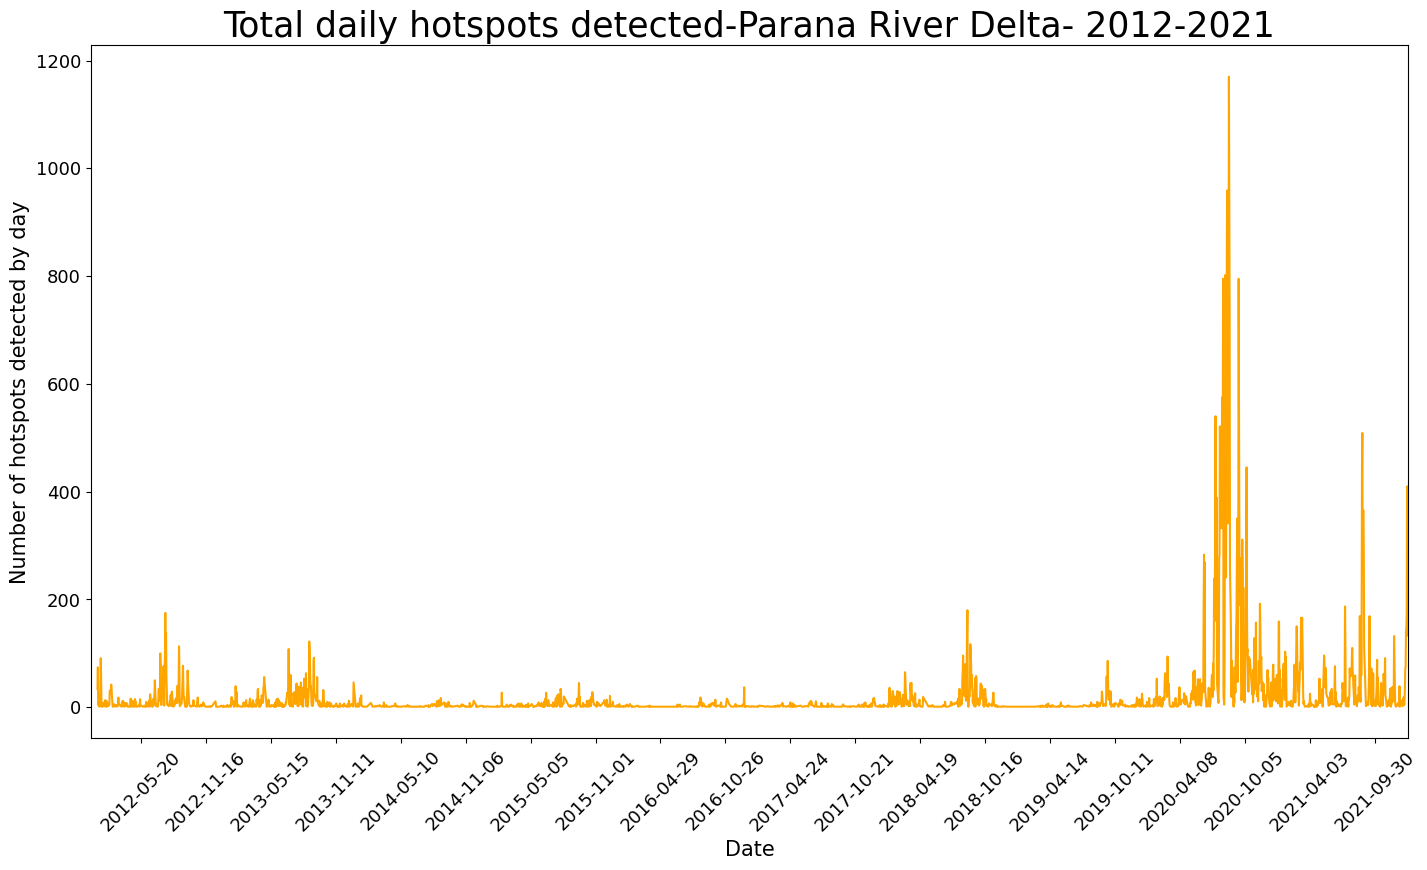

In [ ]:
dfHSArgDeltaCountPlot = dfHSArgDeltaCount.copy().sort_values(by='acq_date', ascending= True) # Run this line to avoid incompatibilities when plotting

fig, ax = plt.subplots(figsize=(17, 9))

ax.plot(dfHSArgDeltaCountPlot['acq_date'],
        dfHSArgDeltaCountPlot['total_hs'],
        linestyle = "-", color = "orange",
        label = "Total daily hotspots")

ax.set_ylabel("Number of hotspots detected by day", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Total daily hotspots detected-Parana River Delta- 2012-2021", fontsize = 25)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlim([dt.date(2012,1,1), dt.date(2022,1,1)])

loc = plticker.MultipleLocator(base= (30*6)) # This locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.setp(ax.get_xticklabels(), rotation = 45)

plt.savefig('Dailyhotspots2012-2021.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the plot for total  heat spots detected by day

In [ ]:
files.download('Dailyhotspots2012-2021.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-e8a42a9cfdbd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataTotalhsYear = dfHSArgDeltaCount.groupby('year_acq').sum()['total_hs'] # Dataframe with total detected hotsposts by year


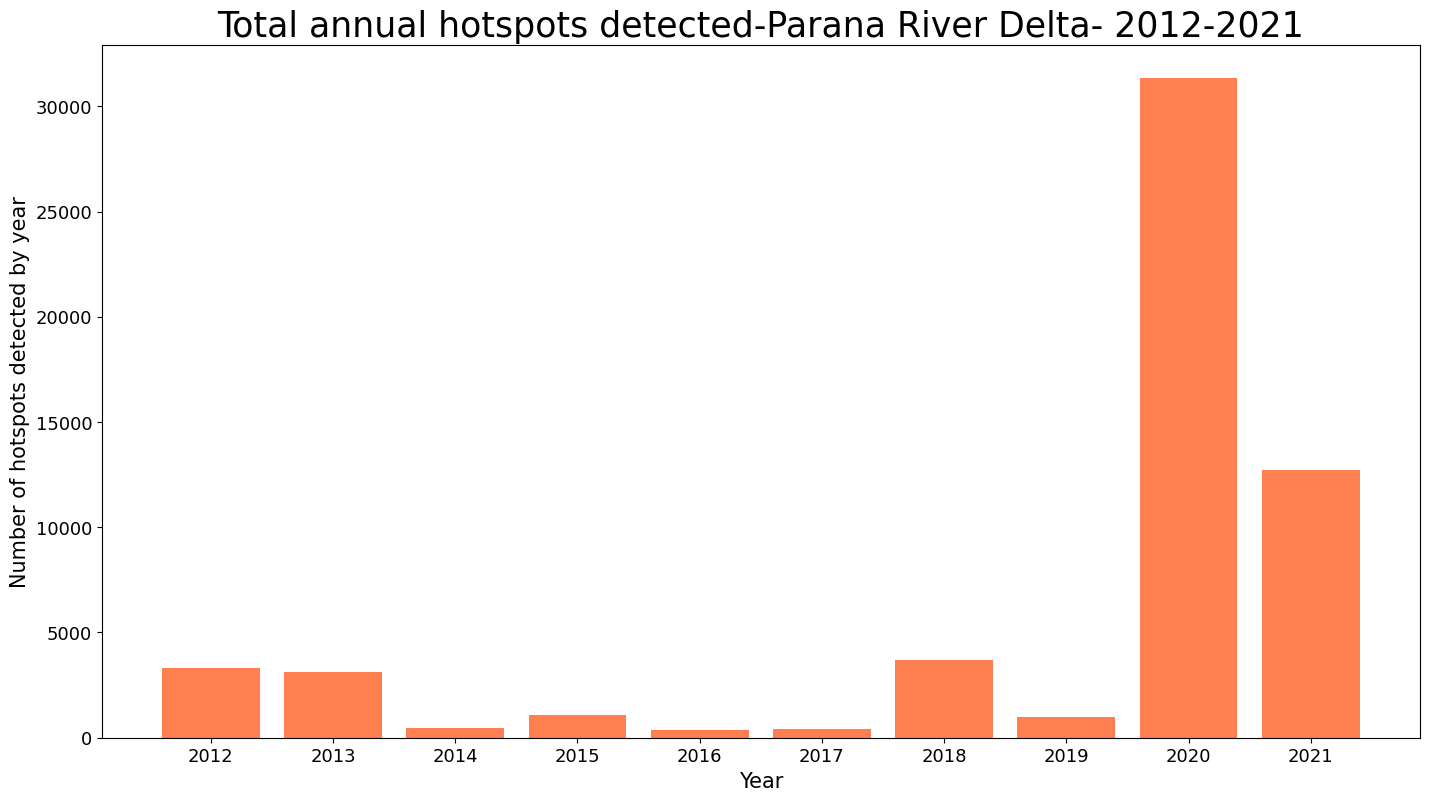

In [ ]:
dataTotalhsYear = dfHSArgDeltaCount.groupby('year_acq').sum()['total_hs'] # Dataframe with total detected hotsposts by year

fig, ax= plt.subplots(figsize=(17, 9))

ax.bar(dataTotalhsYear.index.tolist(),
        np.array(dataTotalhsYear.values),
        color='coral')

ax.set_ylabel("Number of hotspots detected by year", fontsize = 15)
ax.set_xlabel("Year", fontsize = 15)
ax.set_title("Total annual hotspots detected-Parana River Delta- 2012-2021", fontsize = 25)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.savefig('Annualhotspots2012-2021.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the plot for total  heat spots detected by year

In [ ]:
files.download('Annualhotspots2012-2021.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataTotalhsYear.sort_values(ascending = False)

year_acq
2020    31358
2021    12743
2018     3686
2012     3291
2013     3133
2015     1102
2019      982
2014      482
2017      395
2016      381
Name: total_hs, dtype: int64

<ipython-input-10-f7c13fddaec9>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataTotalhsMonth = dfHSArgDeltaCount[dfHSArgDeltaCount['year_acq'] == listYears[i]].groupby('month_acq').sum()['total_hs']
<ipython-input-10-f7c13fddaec9>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax[i].set_ylim(0, dfHSArgDeltaCount[dfHSArgDeltaCount['year_acq'] == '2020'].groupby('month_acq').sum()['total_hs'].values.max() + 300) # Choose max monthly HS year
<ipython-input-10-f7c13fddaec9>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will def

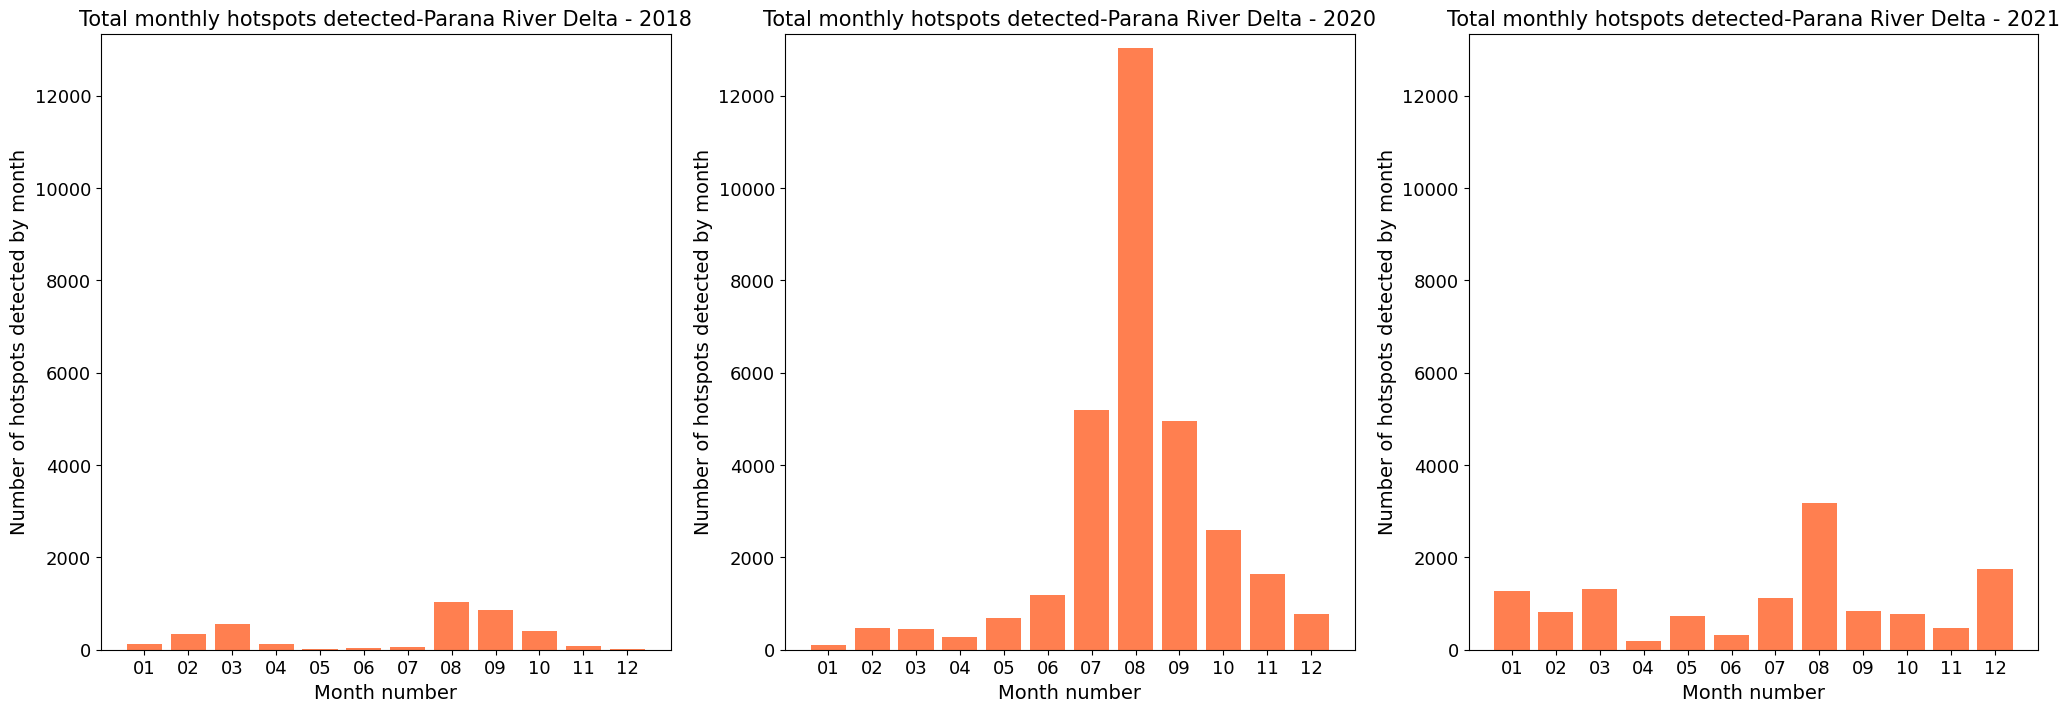

In [ ]:
listYears = ['2018', '2020', '2021']

# create the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

# plot the first data on the first subplot

for i in range(len(listYears)):
  dataTotalhsMonth = dfHSArgDeltaCount[dfHSArgDeltaCount['year_acq'] == listYears[i]].groupby('month_acq').sum()['total_hs']
  ax[i].bar(dataTotalhsMonth.index.tolist(), np.array(dataTotalhsMonth.values), color = 'coral')
  ax[i].set_ylabel("Number of hotspots detected by month", fontsize = 14)
  ax[i].set_xlabel("Month number", fontsize = 14)
  ax[i].set_title("Total monthly hotspots detected-Parana River Delta - " + str(listYears[i]), fontsize = 15)
  ax[i].tick_params(axis='x', labelsize = 13)
  ax[i].tick_params(axis='y', labelsize = 13)
  ax[i].set_ylim(0, dfHSArgDeltaCount[dfHSArgDeltaCount['year_acq'] == '2020'].groupby('month_acq').sum()['total_hs'].values.max() + 300) # Choose max monthly HS year

plt.savefig('MonthlyhotspotsTopthree.png') # Uncomment if you want to download the image

# show the plot
plt.show()

##### Run the following code to download the image with the plot for monthly hotspots detected for top three years

In [ ]:
files.download('MonthlyhotspotsTopthree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(len(listYears)):
  display(dfHSArgDeltaCount[(dfHSArgDeltaCount['year_acq'] == listYears[i]) & (dfHSArgDeltaCount['month_acq'] == '08')].drop(columns = ['year_acq', 'month_acq']).head(5))

,total_hs,acq_date
64,180,2018-08-28
86,139,2018-08-27
115,96,2018-08-16
144,80,2018-08-22
152,76,2018-08-26


,total_hs,acq_date
0,1170,2020-08-22
1,959,2020-08-17
2,939,2020-08-23
3,807,2020-08-16
4,802,2020-08-12


,total_hs,acq_date
14,509,2021-08-27
22,443,2021-08-26
30,365,2021-08-30
31,362,2021-08-29
39,292,2021-08-31


#### **Analysis of spatial distribution of fires**

In [ ]:
# Convertion of pandas dataframe into a geopandas dataframe with geometry set as points from latitude and longitude
gdfHSArgDelta = gpd.GeoDataFrame(
    dfHSArgDelta,
    geometry=gpd.points_from_xy(dfHSArgDelta['longitude'], dfHSArgDelta['latitude']),
    crs='epsg:4326')

Delta = gpd.read_file('/content/DeltaParana.shp') # Study area file path

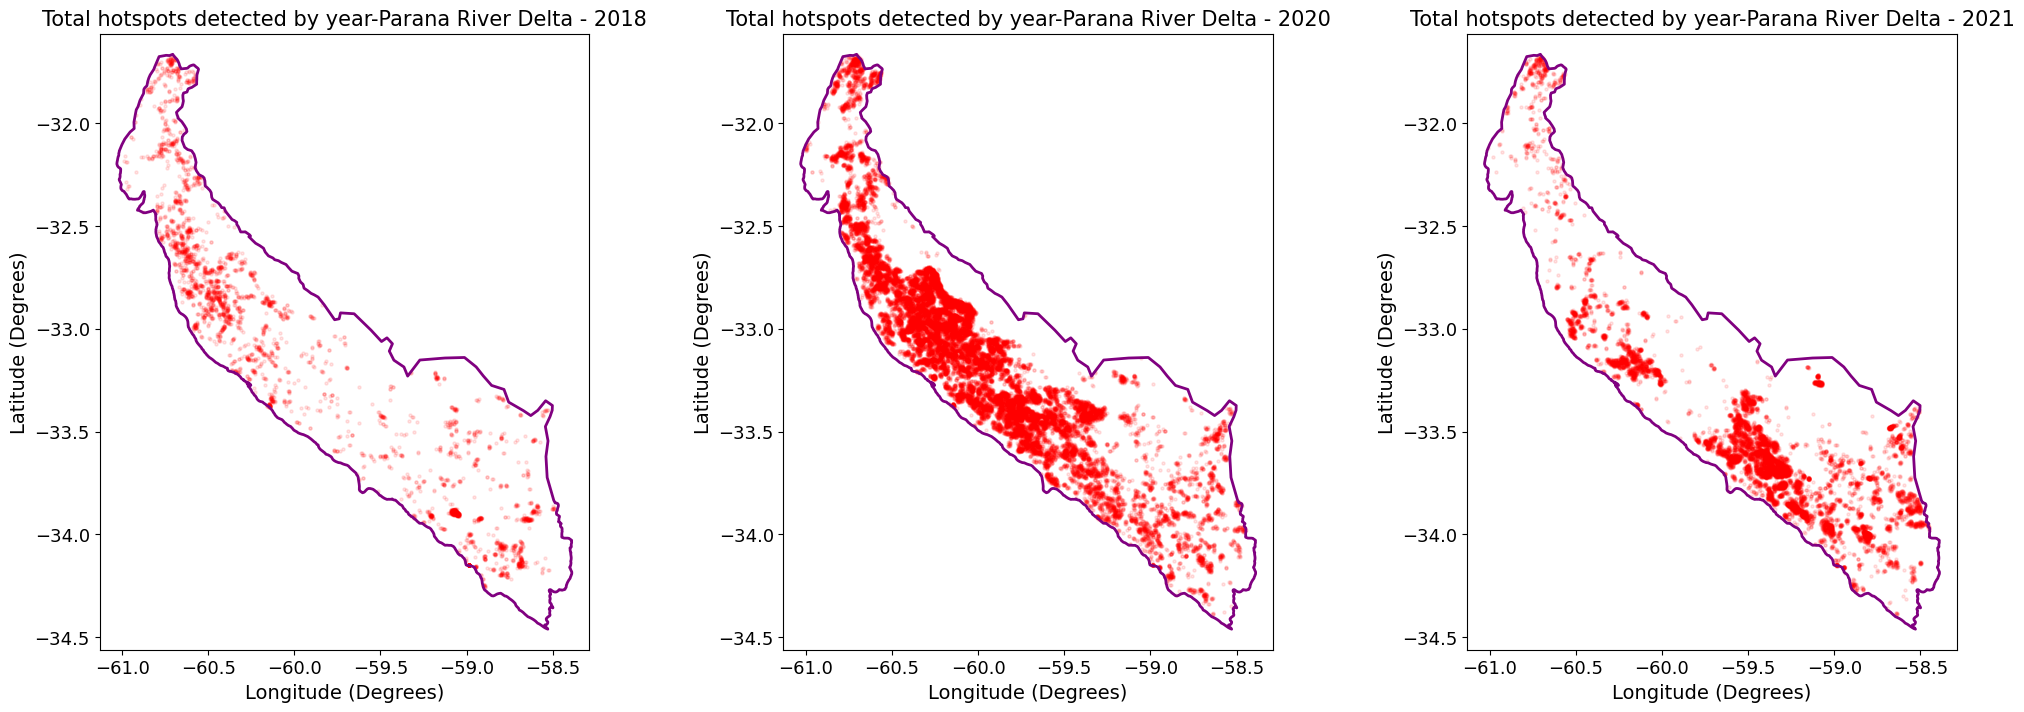

In [ ]:
intlistYears = [2018, 2020, 2021] # Years with the highest number of hotspots detected

fig, ax = plt.subplots(1, 3, figsize = (25, 8))

xlong, ylat = getCoordsSHP(Delta)

for i in range(len(listYears)):
  ax[i].set_xlim([xlong.min() - 0.1, xlong.max() + 0.1])
  ax[i].set_ylim([ylat.min() - 0.1, ylat.max() + 0.1])
  gdfHSArgDelta[gdfHSArgDelta['year_acq'] == intlistYears[i]].plot(ax = ax[i],
                                                                   markersize=5,
                                                                   color='red',
                                                                   alpha = 0.1)
  Delta.plot(ax = ax[i], facecolor = 'none', edgecolor='purple', linewidth=2) #figsize=(20, 10)

  ax[i].set_ylabel('Latitude (Degrees)', fontsize = 14)
  ax[i].set_xlabel('Longitude (Degrees)', fontsize = 14)
  ax[i].set_title("Total hotspots detected by year-Parana River Delta - " + str(intlistYears[i]), fontsize = 15)
  ax[i].tick_params(axis='x', labelsize = 13)
  ax[i].tick_params(axis='y', labelsize = 13)

#plt.savefig('mapsYearhotspotsTopthree.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the plot of spatial distribution of hotspots detected for top three years

In [ ]:
files.download('mapsYearhotspotsTopthree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

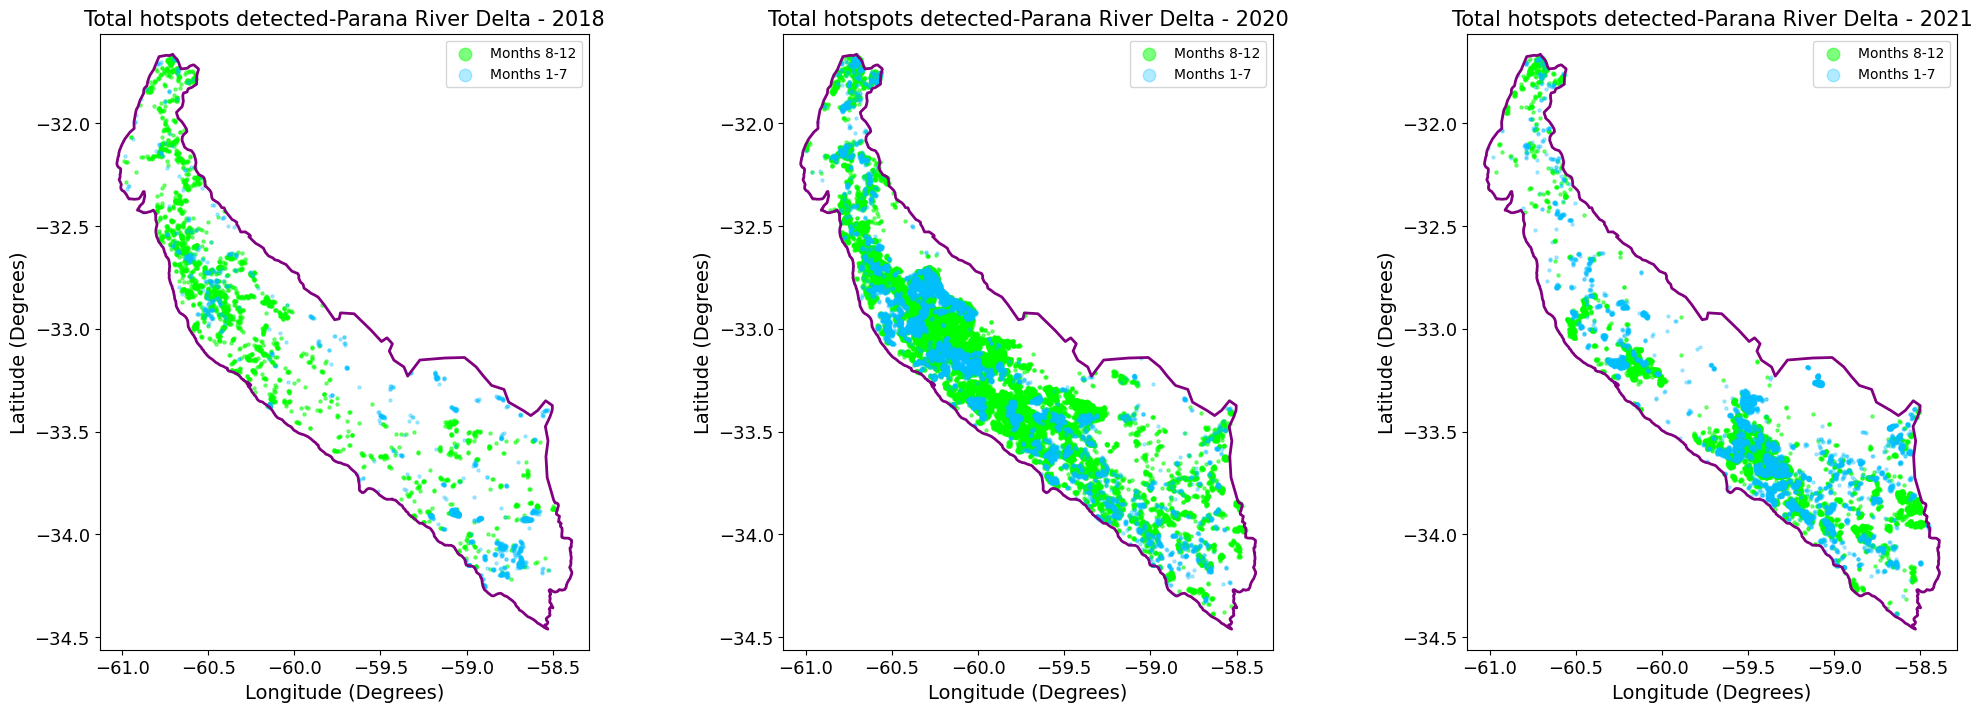

In [ ]:
gdfHSArgDelta['month_acq'] = gdfHSArgDelta['month_acq'].astype(int)

fig, ax = plt.subplots(1, 3, figsize = (25, 8))

xlong, ylat = getCoordsSHP(Delta)

for i in range(len(listYears)):
  ax[i].set_xlim([xlong.min() - 0.1, xlong.max() + 0.1])
  ax[i].set_ylim([ylat.min() - 0.1, ylat.max() + 0.1])
  gdfHSArgDelta[(gdfHSArgDelta['year_acq'] == intlistYears[i]) & (gdfHSArgDelta['month_acq'] > 7)].plot(ax = ax[i],
                                                                                                         markersize=5,
                                                                                                         color = 'lime',
                                                                                                         alpha = 0.5,
                                                                                                         label = 'Months 8-12')
  gdfHSArgDelta[(gdfHSArgDelta['year_acq'] == intlistYears[i]) & (gdfHSArgDelta['month_acq'] <= 7)].plot(ax = ax[i],
                                                                                                        markersize=5,
                                                                                                        color = 'deepskyblue',
                                                                                                        alpha = 0.3,
                                                                                                        label = 'Months 1-7')
  Delta.plot(ax = ax[i], facecolor = 'none', edgecolor='purple', linewidth=2) #figsize=(20, 10)

  ax[i].set_ylabel('Latitude (Degrees)', fontsize = 14)
  ax[i].set_xlabel('Longitude (Degrees)', fontsize = 14)
  ax[i].set_title('Total hotspots detected-Parana River Delta - ' + str(intlistYears[i]), fontsize = 15)
  ax[i].tick_params(axis='x', labelsize = 13)
  ax[i].tick_params(axis='y', labelsize = 13)

  ax[i].legend(loc='best', markerscale =  4)

plt.savefig('mapsDistBefAftAugust.png') # Uncomment if you want to download the image

plt.show()

##### Run the following code to download the image with the plot of spatial distribution of hotspots detected before and after August for top three years

In [ ]:
files.download('mapsDistBefAftAugust.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def strtodatetime(datestr):
  return datetime.strptime(datestr, '%Y-%m-%d')

list_start = [strtodatetime('2018-08-21'), strtodatetime('2020-08-21'), strtodatetime('2021-08-21')]
list_end = [strtodatetime('2018-09-01'), strtodatetime('2020-09-01'), strtodatetime('2021-09-01')]

gdfHSArgDelta['acq_date'] = pd.to_datetime(gdfHSArgDelta['acq_date'], format='%Y/%m/%d')

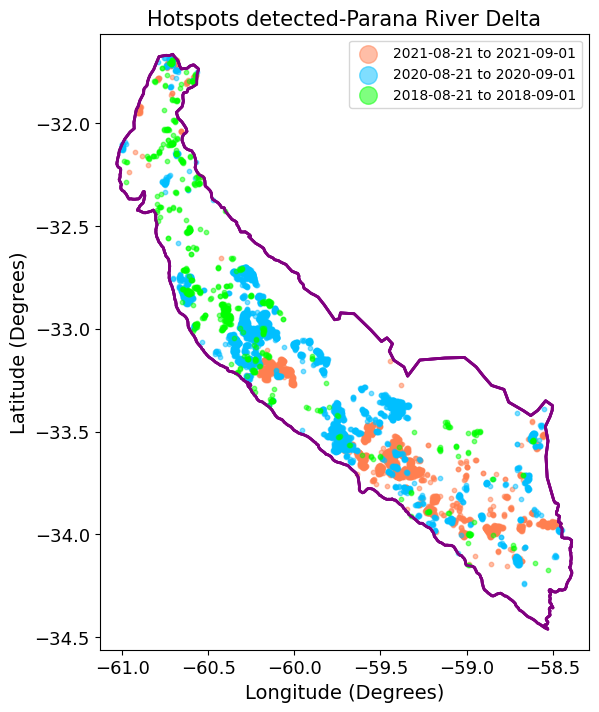

In [ ]:
fig, ax = plt.subplots(figsize = (25, 8))

xlong, ylat = getCoordsSHP(Delta)

for i in range(len(listYears)-1, -1, -1):
  ax.set_xlim([xlong.min() - 0.1, xlong.max() + 0.1])
  ax.set_ylim([ylat.min() - 0.1, ylat.max() + 0.1])

  listColoursDates = ['lime', 'deepskyblue', 'coral']

  gdfHSArgDelta[(gdfHSArgDelta['acq_date'] >= list_start[i]) & (gdfHSArgDelta['acq_date'] <= list_end[i])].plot(ax = ax,
                                                                          markersize = 10,
                                                                          color = listColoursDates[i],
                                                                          alpha = 0.5,
                                                                          label = str(list_start[i])[:10]+' to '+ str(list_end[i])[:10],
                                                                          aspect = 1)

  Delta.plot(ax = ax, facecolor = 'none', edgecolor='purple', linewidth=2)

  ax.set_ylabel('Latitude (Degrees)', fontsize = 14)
  ax.set_xlabel('Longitude (Degrees)', fontsize = 14)
  ax.set_title('Hotspots detected-Parana River Delta', fontsize = 15)
  ax.tick_params(axis='x', labelsize = 13)
  ax.tick_params(axis='y', labelsize = 13)

  ax.legend(loc='best', markerscale =  4)

#plt.savefig('mapsDistDaysHighest.png') # Uncomment if you want to download the image

plt.show()

In [ ]:
files.download('mapsDistDaysHighest.png')